<a href="https://colab.research.google.com/github/pawelrat009/ML2025-1/blob/main/MLzad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pobierz dane dotyczące scoringu kredytowego

Pracujesz jako analityk danych w globalnej firmie finansowej. Przez lata firma gromadziła podstawowe dane bankowe i wiele informacji związanych z kredytami. Kierownictwo chce zbudować inteligentny system do segregowania ludzi w przedziałach oceny kredytowej, aby zmniejszyć wysiłek ręczny.

Zadanie na dziś: przygotować dane do modelu

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import danych

In [3]:

# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "train.csv"

# Load the latest version
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "parisrohan/credit-score-classification", file_path,
)

print("First 5 records:", df.head())

<ipython-input-3-db52f5663265>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "parisrohan/credit-score-classification", file_path,


100%|██████████| 6.09M/6.09M [00:00<00:00, 49.9MB/s]

Extracting zip of train.csv...



/usr/local/lib/python3.11/dist-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


First 5 records:        ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utiliz

Poznaj dane:
1. sprawdź wymiary i typy kolumn
2. usuń duplikaty
3. usuń zbędne kolumny
4. sprawdz liczbę braków danych w poszczególnych kolumnach

ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64
**************************************************
Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64
**************************************************
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
**************************************************
Name
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: count, Lengt

<Axes: xlabel='count', ylabel='Credit_Score'>

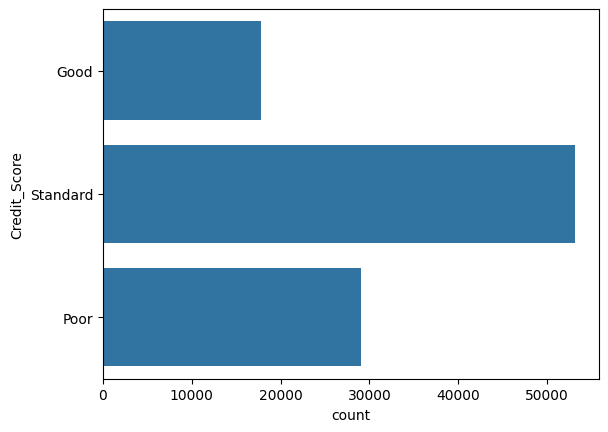

In [4]:
#opisz statystyki danych
df.describe()
#zlicz różne wartości danych
for i in df.columns:
 print(df[i].value_counts())
 print('*'*50)
# pokaż liczności danych kategorycznych
sns.countplot(df['Credit_Score'])
#zastąp błędne dane

In [5]:
# 1. sprawdź wymiary i typy kolumn
print("Wymiary danych:", df.shape)
print("\nTypy danych:\n", df.dtypes)
# 2. usuń duplikaty
df = df.drop_duplicates()
print("\nLiczba wierszy po usunięciu duplikatów:", df.shape[0])
# 4. sprawdz liczbę braków danych w poszczególnych kolumnach
print("\nLiczba brakujących wartości w kolumnach:\n", df.isnull().sum())


Wymiary danych: (100000, 28)

Typy danych:
 ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance     

Usuń kolumny, które nie będą wykorzystywane w analizie ['ID','Customer_ID','SSN','Name']

In [6]:
df = df.drop(columns=['ID','Customer_ID','SSN','Name'])

In [7]:
from termcolor import colored
df.info()
#zmień dane na numeryczne
FeaturesToConvert = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment',
'Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']
# ale najpierw sprawdź czy nie ma błędów w danych
for feature in FeaturesToConvert:
 uniques = df[feature].unique()
 print('Feature:','\n', colored(feature, attrs =['bold']), '\n', uniques,'\n','--'*40,'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

usuń niektore z zbędnych znakow ('_','-'), zmień puste komorki na nan

In [8]:
# usuń zbędne znaki '-’ , '_'
for feature in FeaturesToConvert:
 df[feature] = df[feature].str.strip('-_')
# puste kolumny zastąp NAN
for feature in FeaturesToConvert:
 df[feature] = df[feature].replace({'':np.nan})

Zmień nazwy miesiecy na zmienne liczbowe zgodnie z kolejnością miesięcy

In [9]:
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}
df['Month'] = df['Month'].map(month_mapping)

# sprawdzenie wyników
print(df['Month'].unique())

[1 2 3 4 5 6 7 8]


Zakoduj zmienne tekstowe: 'Occupation', 'Type_of_Loan', 'Payment_Behaviour', 'Credit_Mix', użyj LabelEncodera

In [ ]:
col_to_change = ['Occupation', 'Type_of_Loan', 'Payment_Behaviour', 'Credit_Mix']
le = LabelEncoder()
for col in col_to_change:
    df[col] = le.fit_transform(df[col])

Przelicz kolumne Credit_History_Age na liczbę mięsiecy

In [ ]:
# Rozdzielanie wartości po przecinku i usuwanie zbędnych spacji
df['Type_of_Loan'] = df['Type_of_Loan'].str.split(', ')

# Użycie MultiLabelBinarizer do One-Hot Encoding
mlb = MultiLabelBinarizer()
encoded_df = pd.DataFrame(mlb.fit_transform(df['Type_of_Loan']), columns=mlb.classes_)

# Łączenie z oryginalnym DataFrame
df = df.join(encoded_df).drop(columns=['Type_of_Loan'])

print(df.head())

Zmien inne zmienne na numeryczne

Uzupełnij braki w kolumnie Monthly_Inhand_Salary, Annual_Income, .. średnią

Narysuj rozkłady zmiennych 'Annual_Income', 'Monthly_Balance'

usuń wartości odstające (w przypadku wieku wszystkie ujemne i te powyzej 100 lat)

Zwizualizuj korelacje między zmiennymi